<a href="https://colab.research.google.com/github/gitenterpriseengineer/Data-Structure-Algorithm-Programs/blob/master/EasyVisa_Full_Code_Notebook-Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [67]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [69]:
import pandas as pd
github_raw_url = 'https://raw.githubusercontent.com/gitenterpriseengineer/aiml-program/refs/heads/main/EasyVisa.csv'
df_from_github = pd.read_csv(github_raw_url)


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [73]:
print("First 5 rows of the dataset:")
display(df_from_github.head())

print("\nLast 5 rows of the dataset:")
display(df_from_github.tail())

First 5 rows of the dataset:


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified



Last 5 rows of the dataset:


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [74]:
print("Shape of the dataset (rows, columns):")
display(df_from_github.shape)

Shape of the dataset (rows, columns):


(25480, 12)

#### Check the data types of the columns for the dataset

In [72]:
print("Data types of the columns:")
df_from_github.info()

Data types of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [75]:
print("Statistical summary of the dataset:")
display(df_from_github.describe(include='all').T)

Statistical summary of the dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns

In [76]:
# Replacing negative values in 'no_of_employees' with 0
df_from_github['no_of_employees'] = df_from_github['no_of_employees'].apply(lambda x: 0 if x < 0 else x)

print("Statistical summary of 'no_of_employees' after correction:")
display(df_from_github['no_of_employees'].describe())

Statistical summary of 'no_of_employees' after correction:


,no_of_employees
count,25480.000000
mean,5667.066209
std,22877.923141
min,0.000000
25%,1022.000000
50%,2109.000000
75%,3504.000000
max,602069.000000


#### Let's check the count of each unique category in each of the categorical variables

In [77]:
print("Count of unique categories in each categorical variable:")
for col in df_from_github.select_dtypes(include='object').columns:
    if col != 'case_id':  # 'case_id' is an identifier and not a categorical feature for this analysis
        print(f"\nValue counts for column: {col}")
        display(df_from_github[col].value_counts())
        print("-" * 50)

Count of unique categories in each categorical variable:

Value counts for column: continent


,count
continent,
Asia,16861
Europe,3732
North America,3292
South America,852
Africa,551
Oceania,192


--------------------------------------------------

Value counts for column: education_of_employee


,count
education_of_employee,
Bachelor's,10234
Master's,9634
High School,3420
Doctorate,2192


--------------------------------------------------

Value counts for column: has_job_experience


,count
has_job_experience,
Y,14802
N,10678


--------------------------------------------------

Value counts for column: requires_job_training


,count
requires_job_training,
N,22525
Y,2955


--------------------------------------------------

Value counts for column: region_of_employment


,count
region_of_employment,
Northeast,7195
South,7017
West,6586
Midwest,4307
Island,375


--------------------------------------------------

Value counts for column: unit_of_wage


,count
unit_of_wage,
Year,22962
Hour,2157
Week,272
Month,89


--------------------------------------------------

Value counts for column: full_time_position


,count
full_time_position,
Y,22773
N,2707


--------------------------------------------------

Value counts for column: case_status


,count
case_status,
Certified,17018
Denied,8462


--------------------------------------------------


### Univariate Analysis

In [78]:

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

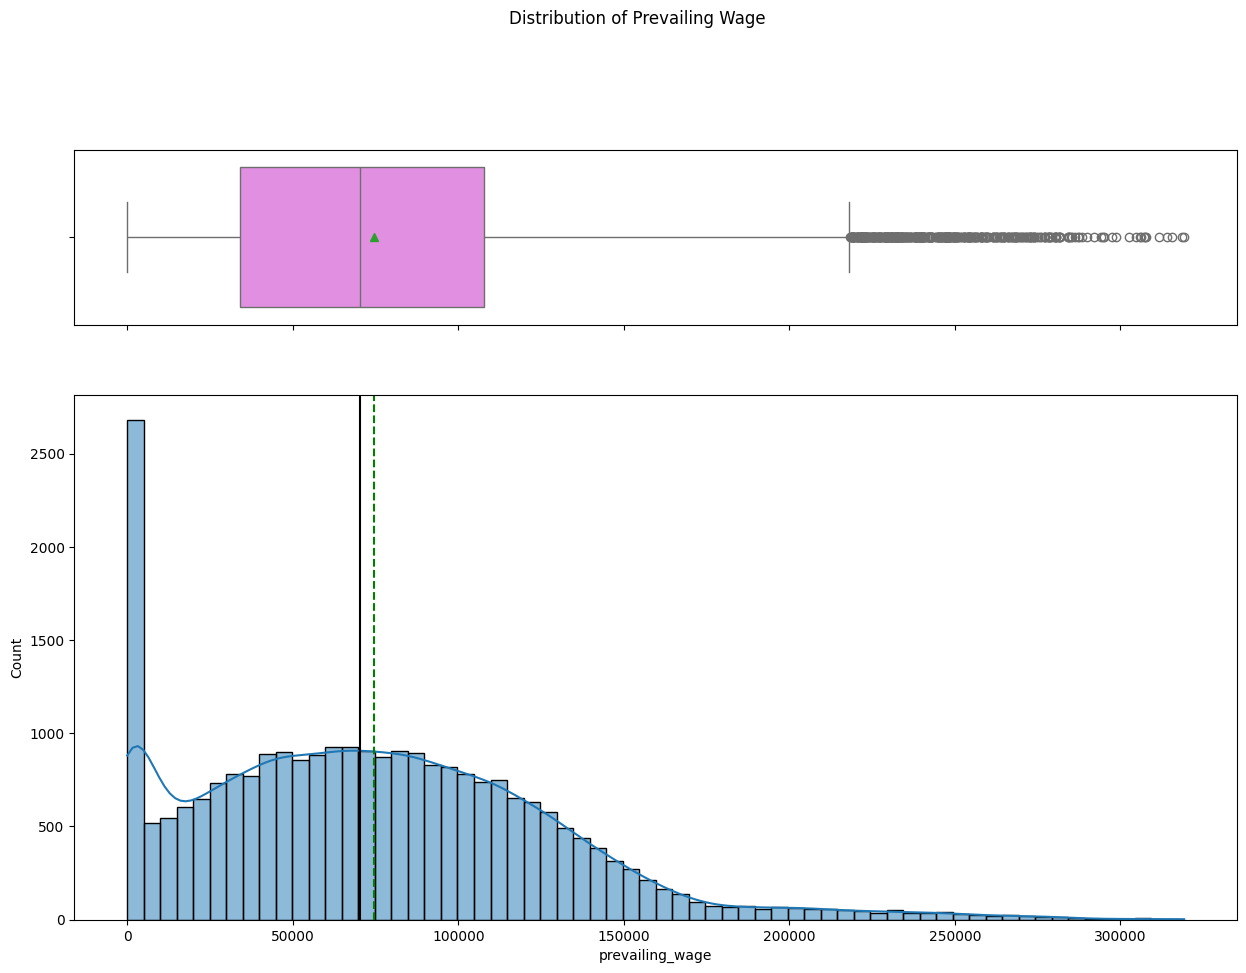

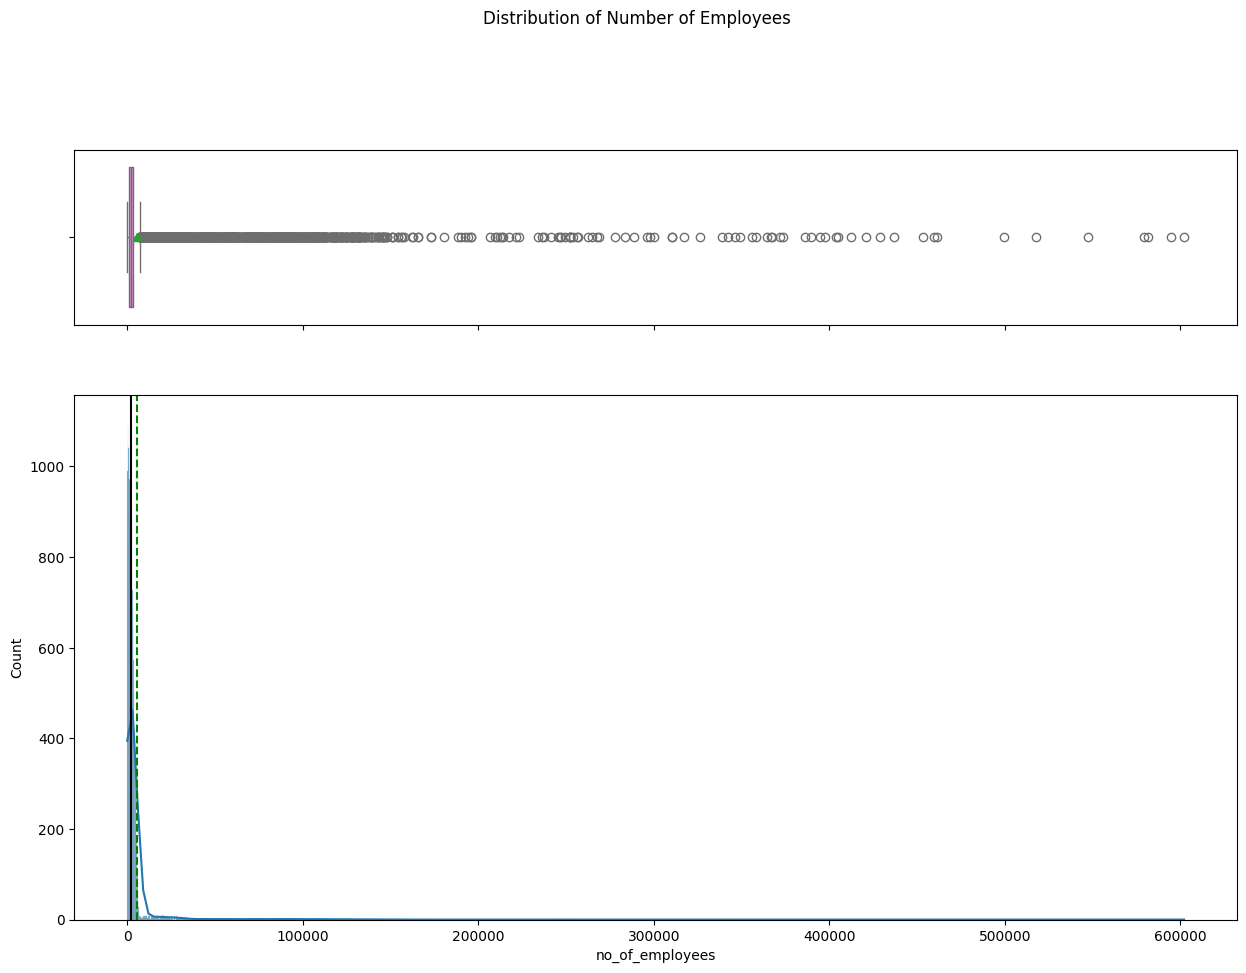

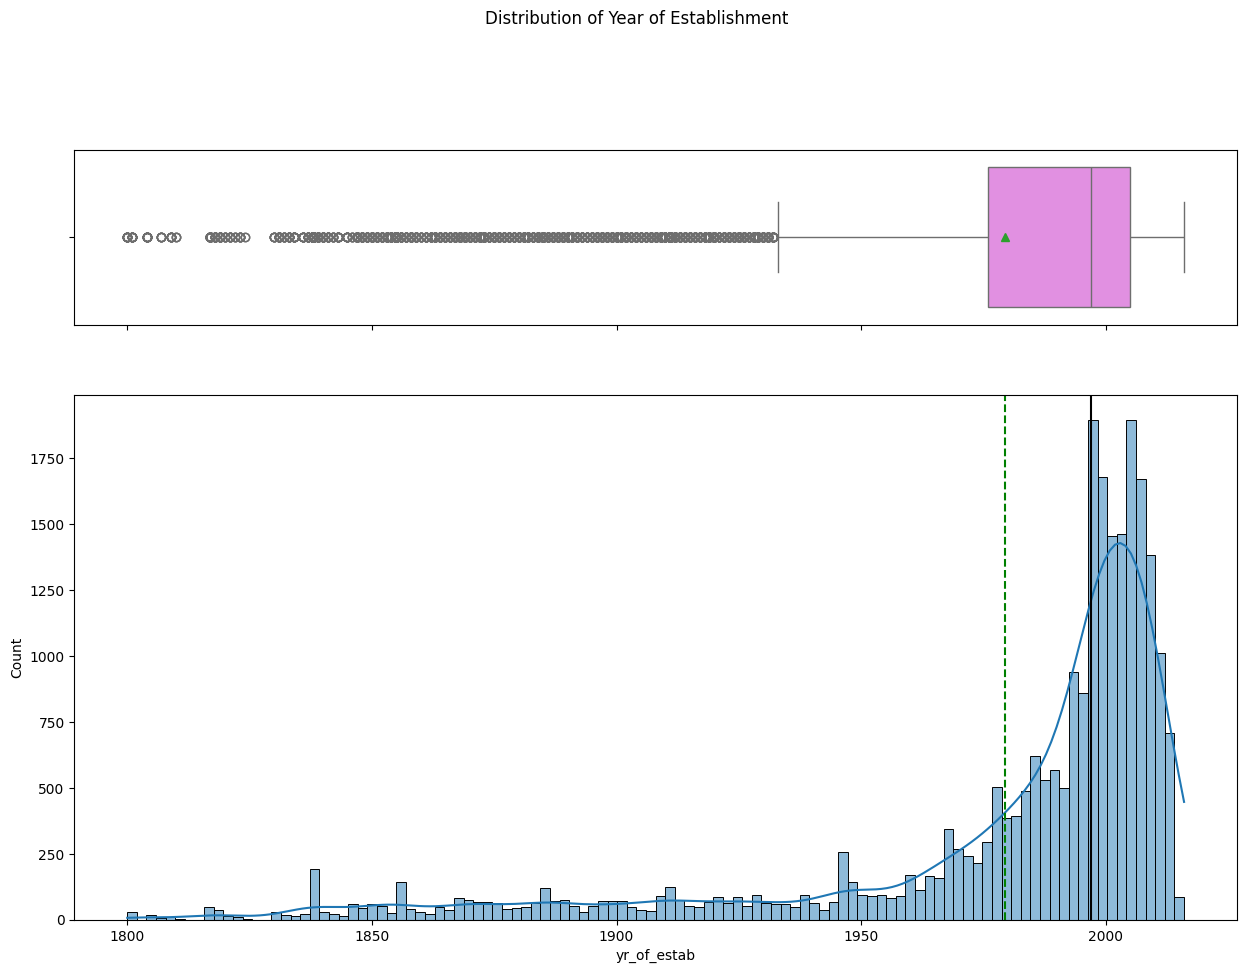

In [79]:
# Univariate Analysis for 'prevailing_wage'
histogram_boxplot(df_from_github, 'prevailing_wage', kde=True)
plt.suptitle('Distribution of Prevailing Wage', y=1.02)
plt.show()

histogram_boxplot(df_from_github, 'no_of_employees', kde=True)
plt.suptitle('Distribution of Number of Employees', y=1.02)
plt.show()


# Univariate Analysis for 'yr_of_estab'
histogram_boxplot(df_from_github, 'yr_of_estab', kde=True)
plt.suptitle('Distribution of Year of Establishment', y=1.02)
plt.show()


In [80]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        hue=feature,  # Added to address FutureWarning
        legend=False  # Added to address FutureWarning
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

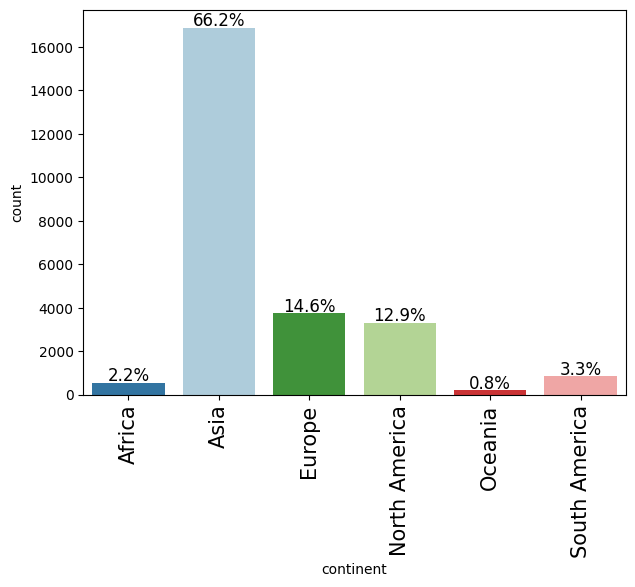

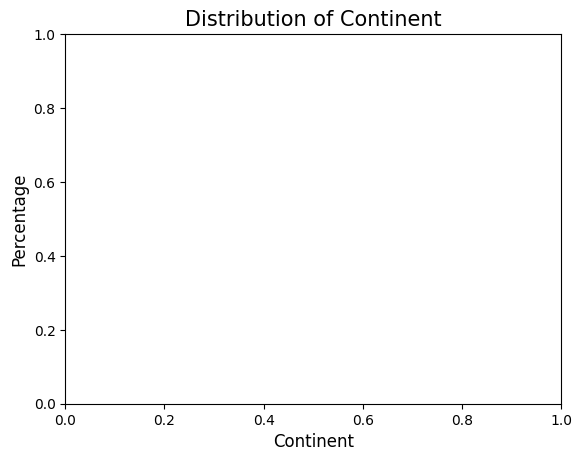

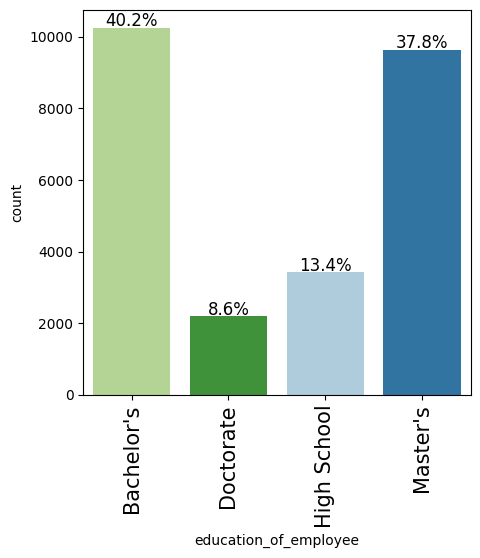

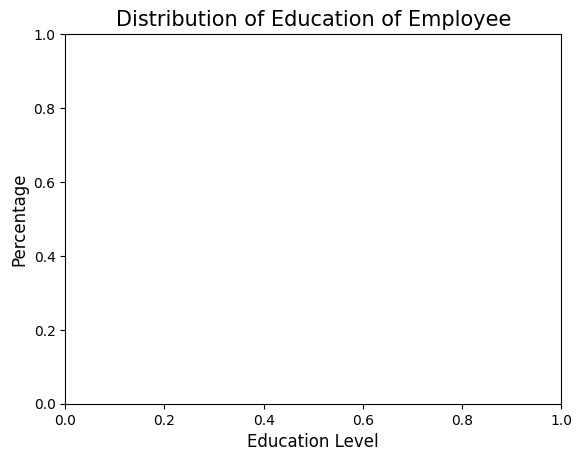

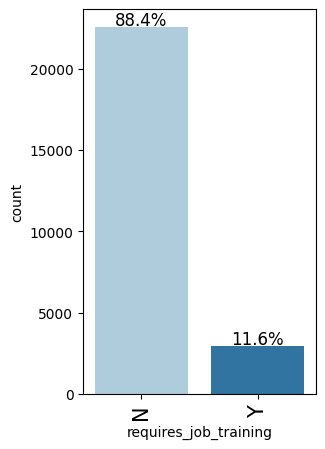

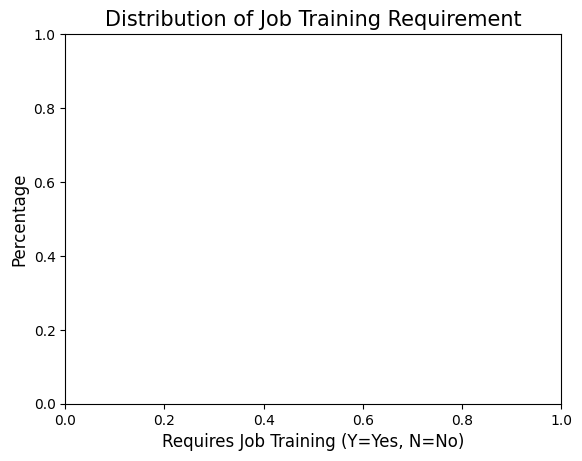

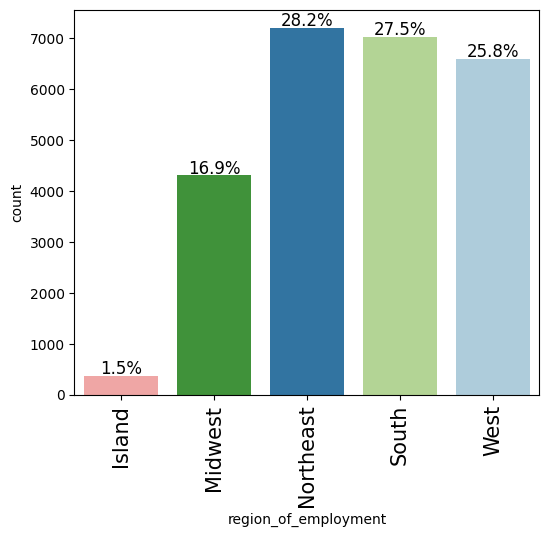

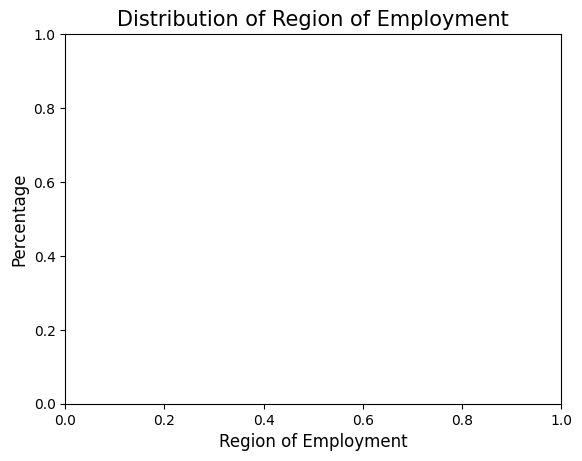

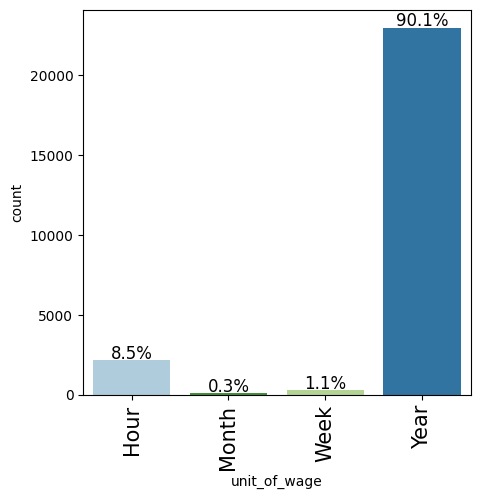

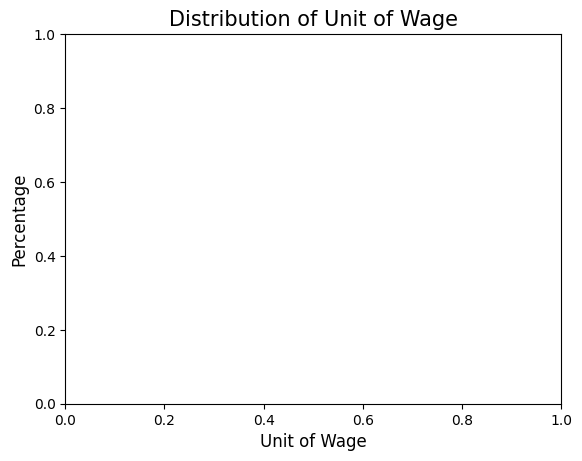

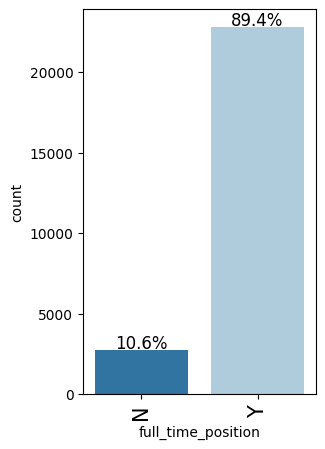

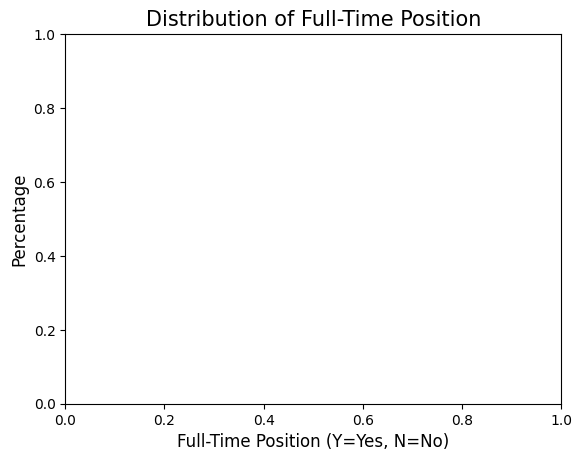

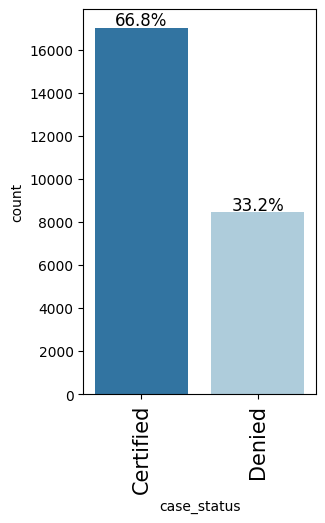

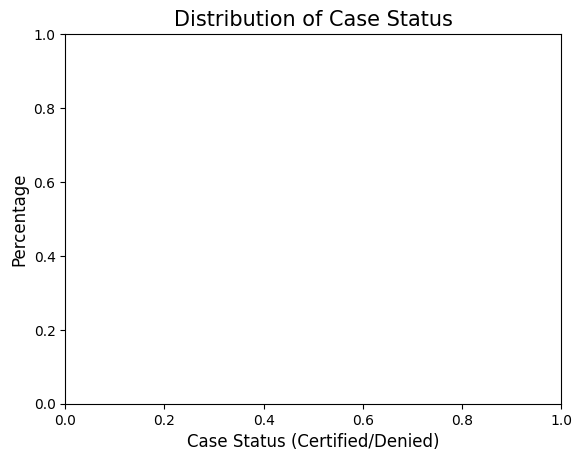

In [81]:
# Univariate Analysis for 'continent'
labeled_barplot(df_from_github, 'continent', perc=True)
plt.title('Distribution of Continent', fontsize=15)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.show()

# Univariate Analysis for 'education_of_employee'
labeled_barplot(df_from_github, 'education_of_employee', perc=True)
plt.title('Distribution of Education of Employee', fontsize=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.show()

# Univariate Analysis for 'requires_job_training'
labeled_barplot(df_from_github, 'requires_job_training', perc=True)
plt.title('Distribution of Job Training Requirement', fontsize=15)
plt.xlabel('Requires Job Training (Y=Yes, N=No)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.show()

# Univariate Analysis for 'region_of_employment'
labeled_barplot(df_from_github, 'region_of_employment', perc=True)
plt.title('Distribution of Region of Employment', fontsize=15)
plt.xlabel('Region of Employment', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.show()


# Univariate Analysis for 'unit_of_wage'
labeled_barplot(df_from_github, 'unit_of_wage', perc=True)
plt.title('Distribution of Unit of Wage', fontsize=15)
plt.xlabel('Unit of Wage', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.show()


# Univariate Analysis for 'full_time_position'
labeled_barplot(df_from_github, 'full_time_position', perc=True)
plt.title('Distribution of Full-Time Position', fontsize=15)
plt.xlabel('Full-Time Position (Y=Yes, N=No)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.show()

# Univariate Analysis for 'case_status'
labeled_barplot(df_from_github, 'case_status', perc=True)
plt.title('Distribution of Case Status', fontsize=15)
plt.xlabel('Case Status (Certified/Denied)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.show()


#### Observations on education of employee

**Based on Analysis Above:**

Bachelor's Degree holders form the largest group, representing approximately 40.16% of all applicants.

Master's Degree holders are the second largest group, accounting for around 37.81% of applicants.

#### Observations on region of employment

**Based on Analysis Above:**


Northeast is the predominant region of employment, accounting for the largest share of applications

 South follows as the second most popular region, representing about 27.5% of the total.

#### Observations on job experience

**Based on Analysis Above:**

most individuals applying for these visas already possess prior work experience, which could be a critical factor in their eligibility or the nature of the positions they are seeking.


#### Observations on case status

**Based on Analysis Above:**

Certified cases constitute a substantial majority, representing approximately 66% of all applications.

Denied cases make up the remaining portion, accounting for about 33% of the total.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [82]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0],legend=False, palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-4195228593.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0],legend=False, palette="gist_rainbow")
/tmp/ipython-input-4195228593.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


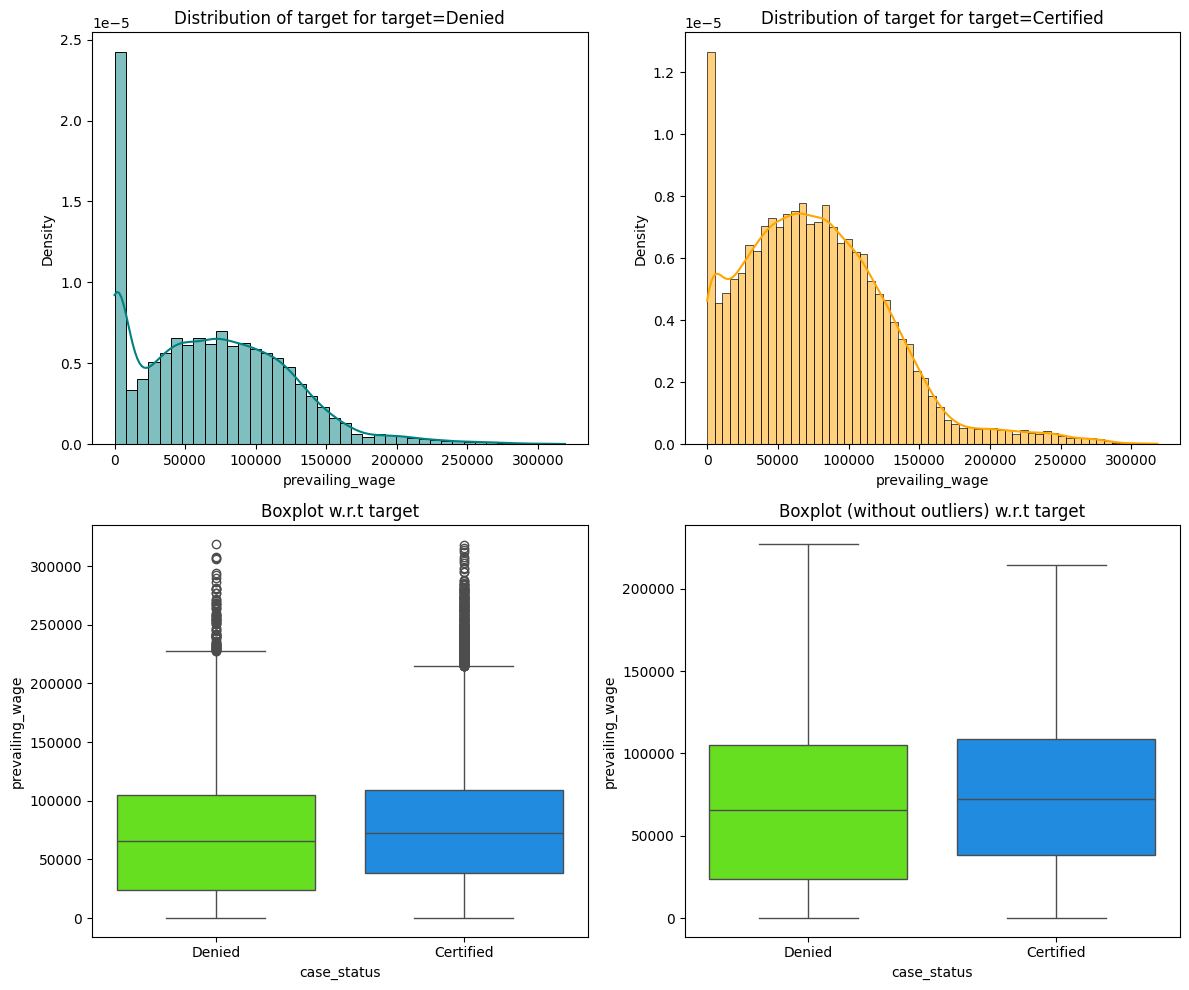

In [83]:
distribution_plot_wrt_target(df_from_github, 'prevailing_wage', 'case_status')

In [84]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Relationship between Continent and Case Status:
case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


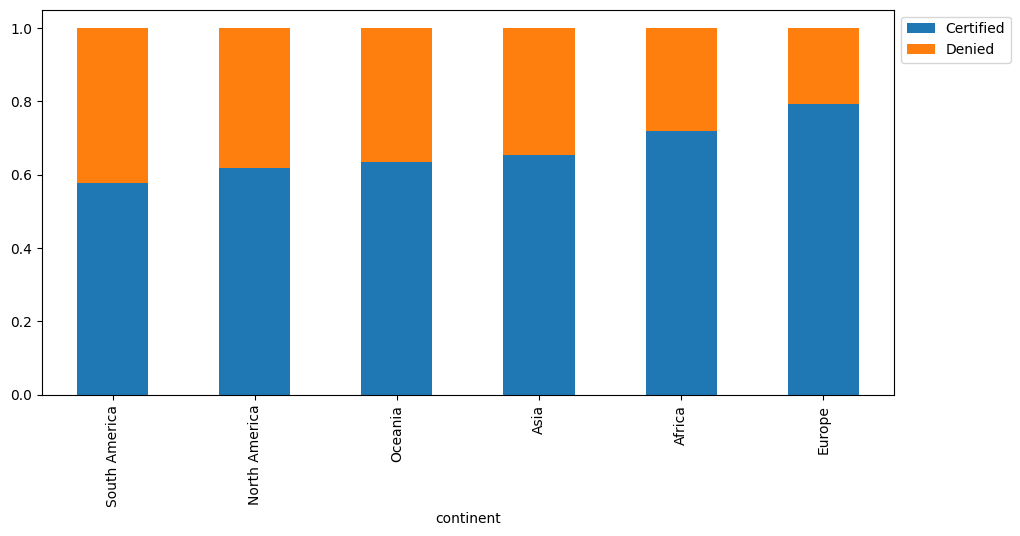

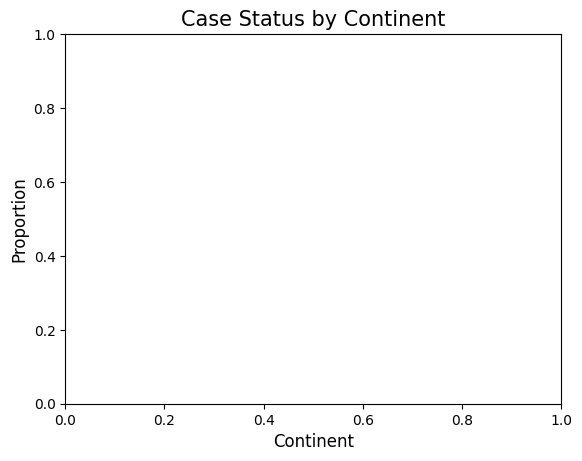

Relationship between Education of Employee and Case Status:
case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


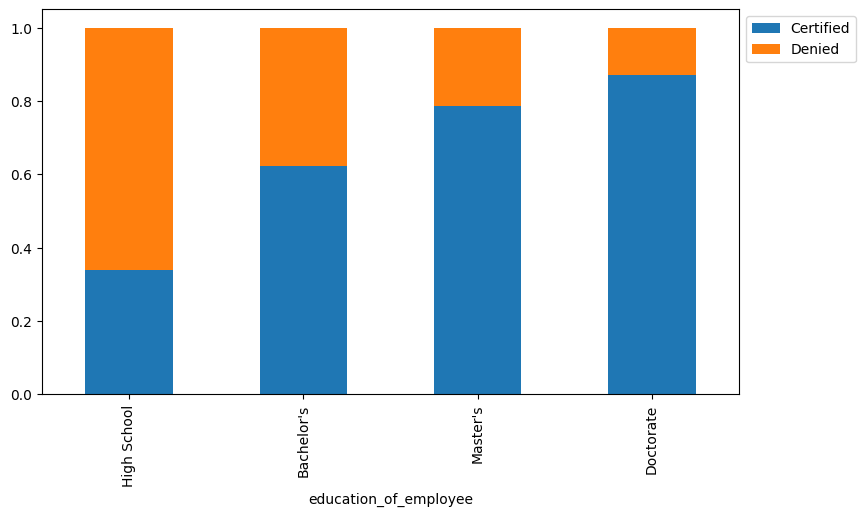

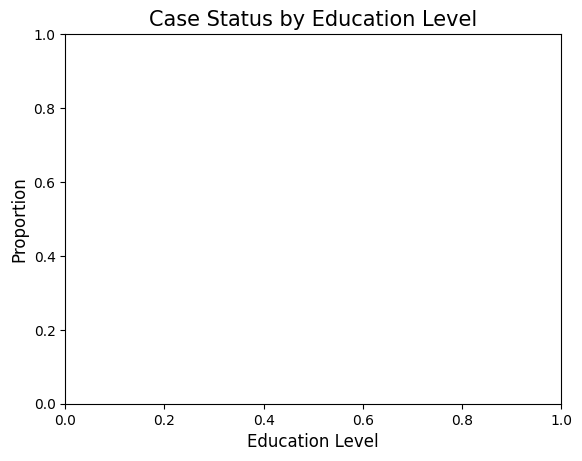

In [85]:
print("Relationship between Continent and Case Status:")
stacked_barplot(df_from_github, 'continent', 'case_status')
plt.title('Case Status by Continent', fontsize=15)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()


print("Relationship between Education of Employee and Case Status:")
stacked_barplot(df_from_github, 'education_of_employee', 'case_status')
plt.title('Case Status by Education Level', fontsize=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()



#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

80th percentile of prevailing wage: 116371.31
Shape of the filtered DataFrame (df_well_paid_jobs): (5096, 12)
First 5 rows of df_well_paid_jobs:


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
18,EZYV19,Africa,Master's,Y,N,4743,2004,Midwest,150441.13,Year,Y,Certified
21,EZYV22,North America,Master's,Y,N,1706,2013,Midwest,137694.98,Year,N,Certified


Relationship between Education of Employee and Case Status for Well-Paid Jobs:
case_status            Certified  Denied   All
education_of_employee                         
All                         3518    1578  5096
Bachelor's                  1282     667  1949
Master's                    1742     461  2203
High School                  247     408   655
Doctorate                    247      42   289
------------------------------------------------------------------------------------------------------------------------


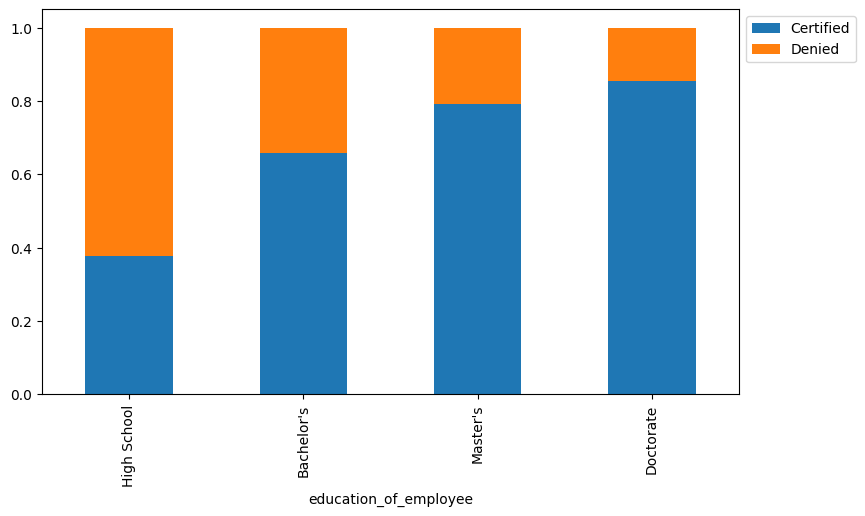

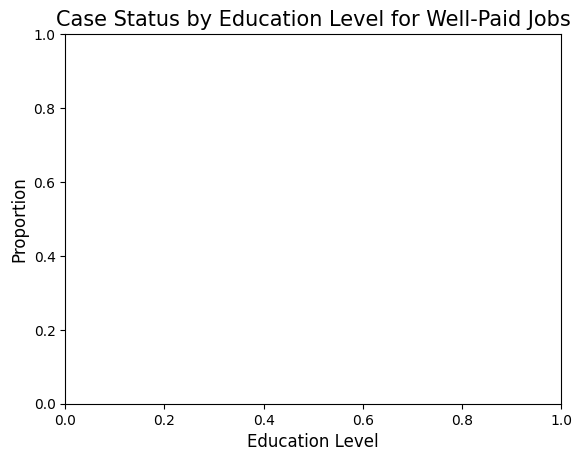

/tmp/ipython-input-472541082.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_from_github, x='education_of_employee', y='prevailing_wage', palette='viridis')


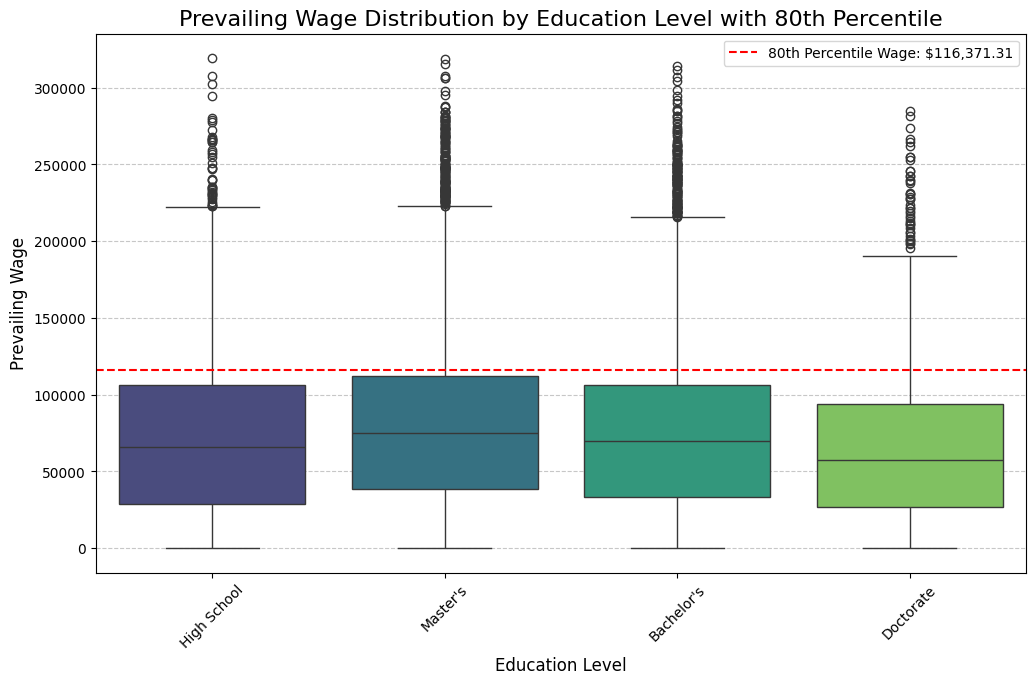

In [86]:

##Assume 80% or more prevailing wage = highly paid

wage_80_percentile = df_from_github['prevailing_wage'].quantile(0.80)
df_well_paid_jobs = df_from_github[df_from_github['prevailing_wage'] >= wage_80_percentile]

print(f"80th percentile of prevailing wage: {wage_80_percentile:.2f}")
print(f"Shape of the filtered DataFrame (df_well_paid_jobs): {df_well_paid_jobs.shape}")
print("First 5 rows of df_well_paid_jobs:")
display(df_well_paid_jobs.head())


print("Relationship between Education of Employee and Case Status for Well-Paid Jobs:")
stacked_barplot(df_well_paid_jobs, 'education_of_employee', 'case_status')
plt.title('Case Status by Education Level for Well-Paid Jobs', fontsize=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()


# Create a boxplot of education_of_employee vs. prevailing_wage
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_from_github, x='education_of_employee', y='prevailing_wage', palette='viridis')

# Add a horizontal line for the 80th percentile wage
plt.axhline(wage_80_percentile, color='red', linestyle='--', label=f'80th Percentile Wage: ${wage_80_percentile:,.2f}')

plt.title('Prevailing Wage Distribution by Education Level with 80th Percentile', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Prevailing Wage', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





**Conclusion :** There is no clear correlation of wages to education as we can see from the vizualisations. However there is clear correlation of education to certified case status.



#### How does visa status vary across different continents?

Relationship between Continent and Case Status:
case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


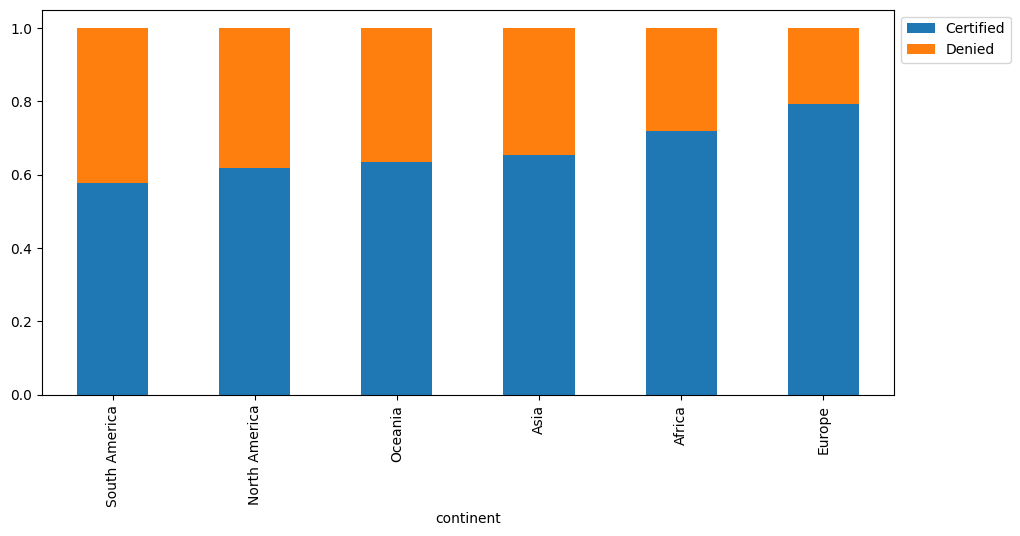

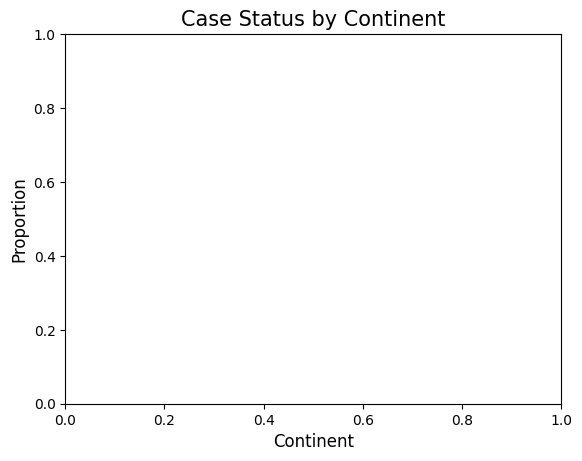

In [87]:
print("Relationship between Continent and Case Status:")
stacked_barplot(df_from_github, 'continent', 'case_status')
plt.title('Case Status by Continent', fontsize=15)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

**Conclusion: **Europe has most certified visa's followed by Africa

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

Relationship between Job Experience and Case Status:
case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


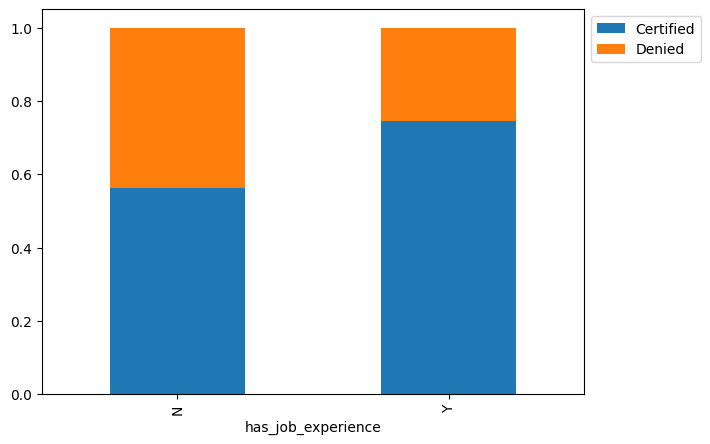

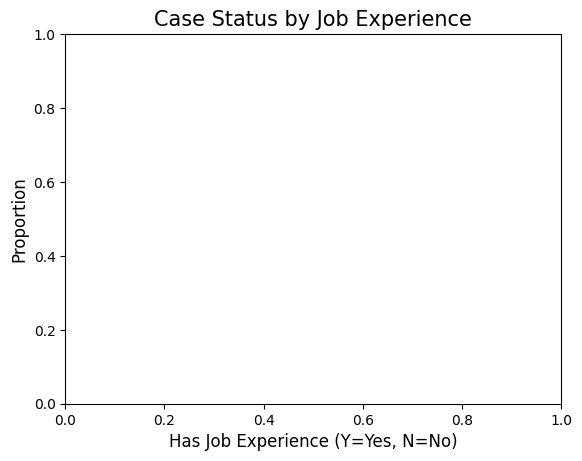

In [88]:
print("Relationship between Job Experience and Case Status:")
stacked_barplot(df_from_github, 'has_job_experience', 'case_status')
plt.title('Case Status by Job Experience', fontsize=15)
plt.xlabel('Has Job Experience (Y=Yes, N=No)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

**Conclustion:** It clearly does have a direct correlation with visa approvals

#### Is the prevailing wage consistent across all regions of the US?

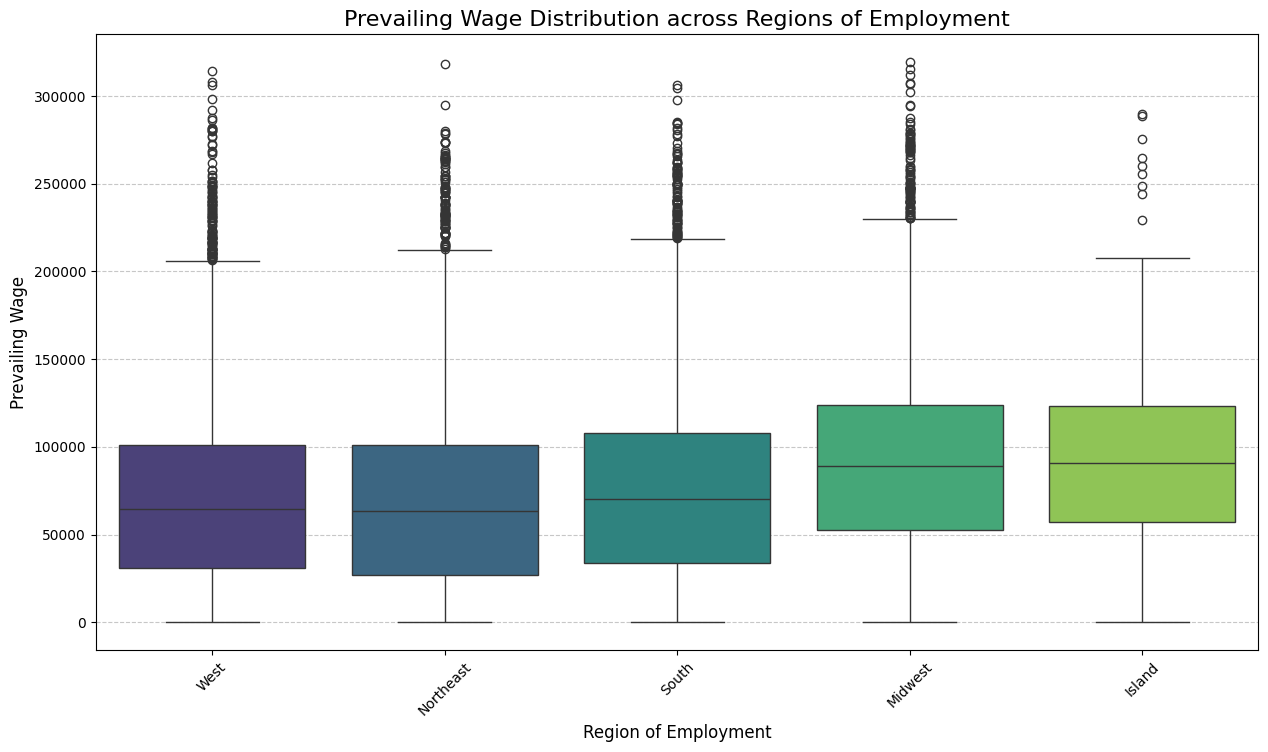

In [53]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_from_github, x='region_of_employment', y='prevailing_wage', palette='viridis', hue='region_of_employment', legend=False)
plt.title('Prevailing Wage Distribution across Regions of Employment', fontsize=16)
plt.xlabel('Region of Employment', fontsize=12)
plt.ylabel('Prevailing Wage', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Conclussion:** Prevailing wages are not consistent across all US regions, showing a clear geographical disparity.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

/tmp/ipython-input-4195228593.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0],legend=False, palette="gist_rainbow")
/tmp/ipython-input-4195228593.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


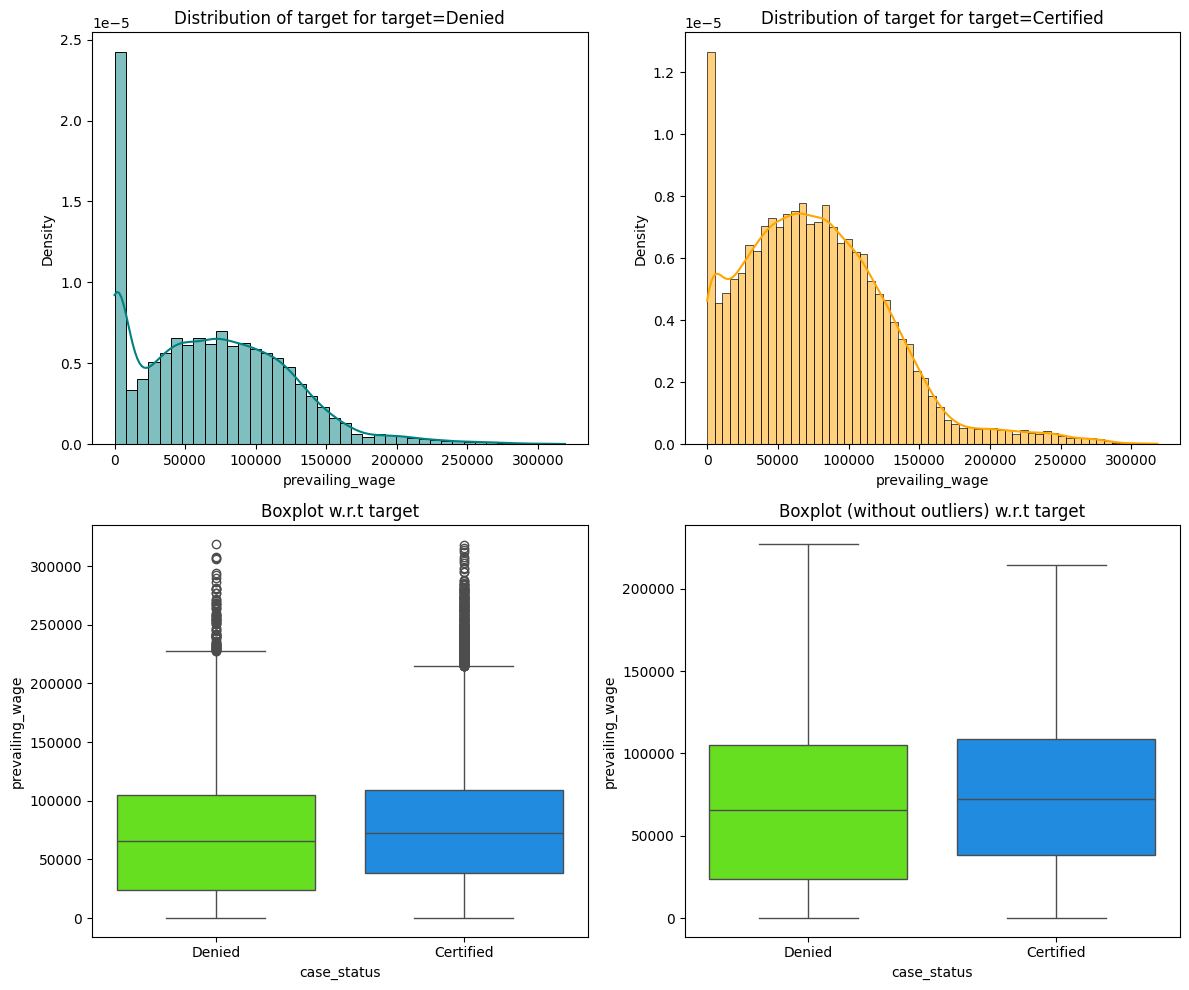

In [55]:
distribution_plot_wrt_target(df_from_github, 'prevailing_wage', 'case_status')

**Conclusion:** While prevailing_wage alone is not a definitive predictor, a higher prevailing wage generally increases the chances of visa certification.

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

Relationship between Unit of Wage and Case Status:
case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


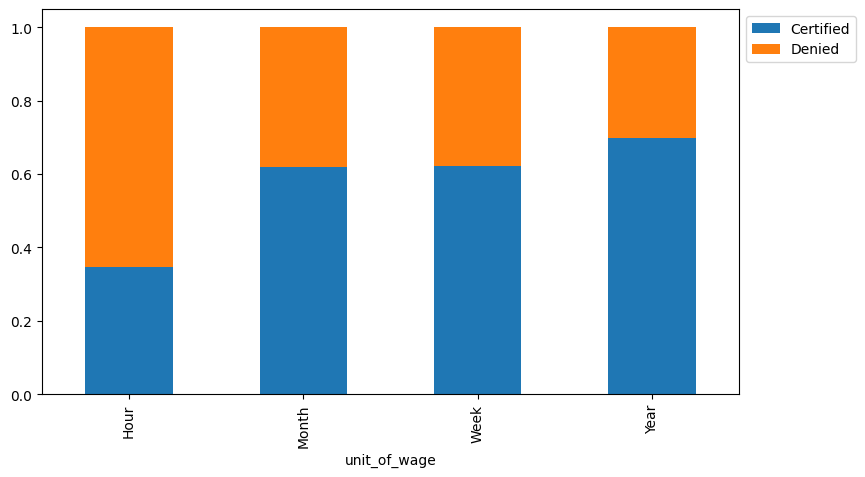

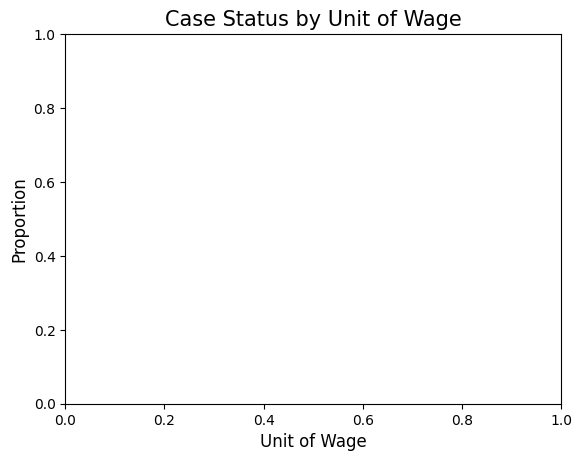

In [57]:
print("Relationship between Unit of Wage and Case Status:")
stacked_barplot(df_from_github, 'unit_of_wage', 'case_status')
plt.title('Case Status by Unit of Wage', fontsize=15)
plt.xlabel('Unit of Wage', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

**Conclusion: **Higher yearly wages seems to have a strong correlation to certified cases

## Data Pre-processing

### Outlier Check

In [1]:
### Convert Outliers

def treat_outliers(df, col, lower_bound_multiplier=1.5, upper_bound_multiplier=1.5):
    """
    Capping the outliers using the IQR method.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (lower_bound_multiplier * IQR)
    upper_bound = Q3 + (upper_bound_multiplier * IQR)

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Ensure 'no_of_employees' does not go below 0
    if col == 'no_of_employees':
        df[col] = df[col].clip(lower=0)

    return df

## Convert to yearly wages

def convert_to_yearly_wage(row):
    wage = row['prevailing_wage']
    unit = row['unit_of_wage']

    if unit == 'Hour':
        return wage * 8 * 5 * 52  # 8 hours/day * 5 days/week * 52 weeks/year
    elif unit == 'Week':
        return wage * 52
    elif unit == 'Month':
        return wage * 12
    else:  # 'Year'
        return wage




In [9]:
# Apply outlier treatment to 'prevailing_wage'
df_from_github = treat_outliers(df_from_github, 'prevailing_wage')

# Apply outlier treatment to 'no_of_employees'
df_from_github = treat_outliers(df_from_github, 'no_of_employees')

# Apply outlier treatment to 'yr_of_estab'
df_from_github = treat_outliers(df_from_github, 'yr_of_estab')

print("Statistical summary after outlier treatment:")
display(df_from_github[['prevailing_wage', 'no_of_employees', 'yr_of_estab']].describe().T)

# Apply wage standardization
df_from_github['prevailing_wage'] = df_from_github.apply(convert_to_yearly_wage, axis=1)

print("First 5 rows of the DataFrame after wage standardization:")
display(df_from_github.head())

print("Statistical summary of 'prevailing_wage' after standardization:")
display(df_from_github['prevailing_wage'].describe())

# Drop 'unit_of_wage' after it has been used, ignoring if it's already gone
df_from_github = df_from_github.drop(columns=['unit_of_wage'], errors='ignore')

Statistical summary after outlier treatment:


,count,mean,std,min,25%,50%,75%,max
prevailing_wage,25480.0,73961.381602,51229.260352,2.1367,34015.48,70308.21,107735.5125,218315.56125
no_of_employees,25480.0,2495.011931,1874.460120,0.0000,1022.00,2109.00,3504.0000,7227.00000
yr_of_estab,25480.0,1985.957143,25.813205,1932.5000,1976.00,1997.00,2005.0000,2016.00000


First 5 rows of the DataFrame after wage standardization:


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,7227,2007.0,West,1231782.032,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002.0,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,7227,2008.0,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1932.5,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005.0,South,149907.390,Year,Y,Certified


Statistical summary of 'prevailing_wage' after standardization:


,prevailing_wage
count,2.548000e+04
mean,1.966584e+05
std,5.743359e+05
min,1.000000e+02
25%,4.710796e+04
50%,8.283946e+04
75%,1.248250e+05
max,1.135241e+07


### Data Preparation for modeling

In [10]:
##Encode features


from sklearn.preprocessing import LabelEncoder

# 1. Drop 'case_id' column (unit_of_wage is now dropped in the previous cell)
df_from_github = df_from_github.drop(columns=['case_id'])

# 2. Identify categorical columns for one-hot encoding (excluding 'case_status')
categorical_cols = df_from_github.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('case_status')

# 3. Apply one-hot encoding
df_from_github = pd.get_dummies(df_from_github, columns=categorical_cols, drop_first=True)

# 4. Apply label encoding to 'case_status'
le = LabelEncoder()
df_from_github['case_status'] = le.fit_transform(df_from_github['case_status'])

print("First 5 rows of the DataFrame after encoding:")
display(df_from_github.head())

print("Data types of the columns after encoding:")
df_from_github.info()


### Splitting Data into Training and Testing Sets and Scaling Numerical Features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) from the target variable (y)
X = df_from_github.drop(columns=['case_status'])
y = df_from_github['case_status']

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Shapes of the datasets after splitting:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Identify numerical columns remaining in the features DataFrame (X)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 4. Initialize StandardScaler
scaler = StandardScaler()

# 5. Fit scaler to training data's numerical columns and transform both train and test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nFirst 5 rows of scaled X_train:")
display(X_train.head())

First 5 rows of the DataFrame after encoding:


,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_Y
0,7227,2007.0,1231782.032,1,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True
1,2412,2002.0,83425.650,0,True,False,False,False,False,False,False,True,True,False,False,True,False,False,True
2,7227,2008.0,122996.860,1,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True
3,98,1932.5,83434.030,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,1082,2005.0,149907.390,0,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True


Data types of the columns after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   yr_of_estab                        25480 non-null  float64
 2   prevailing_wage                    25480 non-null  float64
 3   case_status                        25480 non-null  int64  
 4   continent_Asia                     25480 non-null  bool   
 5   continent_Europe                   25480 non-null  bool   
 6   continent_North America            25480 non-null  bool   
 7   continent_Oceania                  25480 non-null  bool   
 8   continent_South America            25480 non-null  bool   
 9   education_of_employee_Doctorate    25480 non-null  bool   
 10  education_of_employee_High School  25480 non-null  bool   
 11  education_of

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_Y
5086,-1.060144,0.466726,0.925010,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
24685,-0.702785,0.388961,-0.279396,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True
5392,1.390393,0.544491,-0.236427,False,True,False,False,False,False,True,False,True,False,False,False,False,True,True
9718,-0.896598,0.855551,-0.148925,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True
20604,-0.823852,0.661139,-0.259768,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [46]:
### Create a basline Model
import xgboost as xgb

# 1. Instantiate an XGBClassifier with random_state=42
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

print("XGBoost Classifier trained successfully.")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [19:59:39] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier trained successfully.


In [47]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [48]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


Confusion Matrix for XGBoost Model on Test Set:


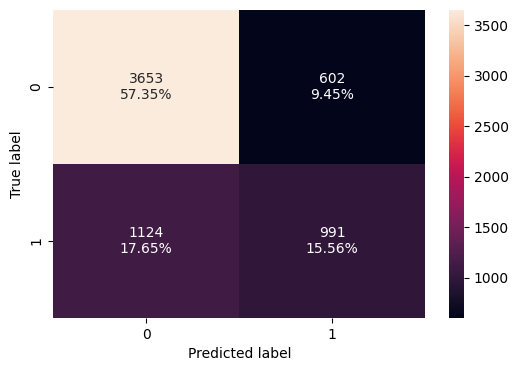

In [52]:



print("\nConfusion Matrix for XGBoost Model on Test Set:")
confusion_matrix_sklearn(xgb_model, X_test, y_test)



#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [50]:
from sklearn.metrics import make_scorer, recall_score

# Define a scorer for cross-validation and hyperparameter tuning
scorer = make_scorer(recall_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [65]:

##Lets use the model we built with Original data earlier

# Perfrormance on original data
print("\nPerformance on Training Set (XGBoost):")
xgb_model_train_perf = model_performance_classification_sklearn(xgb_model, X_train, y_train)
display(xgb_model_train_perf)


print("\nPerformance on Test Set (XGBoost):")
xgb_model_test_perf = model_performance_classification_sklearn(xgb_model, X_test, y_test)
display(xgb_model_test_perf)


Performance on Training Set (XGBoost):


,Accuracy,Recall,Precision,F1
0,0.842439,0.656058,0.834135,0.734456



Performance on Test Set (XGBoost):


,Accuracy,Recall,Precision,F1
0,0.729042,0.468558,0.622097,0.53452


### Model Building with Oversampled data

In [54]:
###Oversample the Data (use SMOTE)

from imblearn.over_sampling import SMOTE

# 1. Instantiate a SMOTE object
sm = SMOTE(random_state=42)

# 2. Apply SMOTE to the training data
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

# 3. Print the shape of the oversampled datasets
print(f"Shape of X_train_oversampled: {X_train_oversampled.shape}")
print(f"Shape of y_train_oversampled: {y_train_oversampled.shape}")

# 4. Display the value counts for y_train_oversampled
print("\nClass distribution of y_train_oversampled:")
display(y_train_oversampled.value_counts())

Shape of X_train_oversampled: (25526, 18)
Shape of y_train_oversampled: (25526,)

Class distribution of y_train_oversampled:


,count
case_status,
1,12763
0,12763


XGBoost Classifier with Oversampled Data trained successfully.

Performance on Oversampled Training Set (XGBoost):


,Accuracy,Recall,Precision,F1
0,0.838596,0.820183,0.851542,0.835568



Performance on Original Test Set (XGBoost with Oversampled Training):


,Accuracy,Recall,Precision,F1
0,0.716484,0.587234,0.571034,0.579021



Confusion Matrix for XGBoost Model (Oversampled Training) on Test Set:


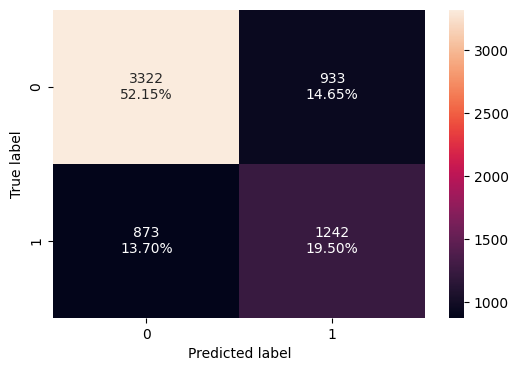

In [56]:
###Train it using this oversampled data and evaluate metrics


import xgboost as xgb

# 1. Instantiate an XGBClassifier with random_state=42 and eval_metric='logloss'
# Note: 'use_label_encoder' parameter is deprecated and removed for clarity.
xgb_model_oversampled = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# 2. Fit the XGBoost model to the oversampled training data
xgb_model_oversampled.fit(X_train_oversampled, y_train_oversampled)

print("XGBoost Classifier with Oversampled Data trained successfully.")

# 3. Calculate and display performance metrics for the oversampled training set
print("\nPerformance on Oversampled Training Set (XGBoost):")
xgb_oversampled_train_perf = model_performance_classification_sklearn(xgb_model_oversampled, X_train_oversampled, y_train_oversampled)
display(xgb_oversampled_train_perf)

# 4. Calculate and display performance metrics for the original test set
print("\nPerformance on Original Test Set (XGBoost with Oversampled Training):")
xgb_oversampled_test_perf = model_performance_classification_sklearn(xgb_model_oversampled, X_test, y_test)
display(xgb_oversampled_test_perf)

# 5. Generate and display the confusion matrix for the original test set
print("\nConfusion Matrix for XGBoost Model (Oversampled Training) on Test Set:")
confusion_matrix_sklearn(xgb_model_oversampled, X_test, y_test)

### Model Building with Undersampled data

In [58]:
### Create Undersample data

from imblearn.under_sampling import RandomUnderSampler

# 1. Instantiate a RandomUnderSampler object
us = RandomUnderSampler(random_state=42)

# 2. Apply undersampling to the training data
X_train_undersampled, y_train_undersampled = us.fit_resample(X_train, y_train)

# 3. Print the shape of the undersampled datasets
print(f"Shape of X_train_undersampled: {X_train_undersampled.shape}")
print(f"Shape of y_train_undersampled: {y_train_undersampled.shape}")

# 4. Display the value counts for y_train_undersampled
print("\nClass distribution of y_train_undersampled:")
display(y_train_undersampled.value_counts())

Shape of X_train_undersampled: (12694, 18)
Shape of y_train_undersampled: (12694,)

Class distribution of y_train_undersampled:


,count
case_status,
0,6347
1,6347


XGBoost Classifier with Undersampled Data trained successfully.

Performance on Undersampled Training Set (XGBoost):


,Accuracy,Recall,Precision,F1
0,0.86017,0.857886,0.861823,0.85985



Performance on Original Test Set (XGBoost with Undersampled Training):


,Accuracy,Recall,Precision,F1
0,0.689953,0.684161,0.525418,0.594373



Confusion Matrix for XGBoost Model (Undersampled Training) on Test Set:


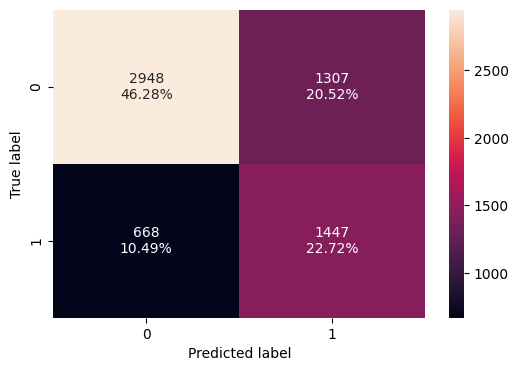

In [59]:
###Train it using this undersampled data and evaluate metrics

import xgboost as xgb

# 1. Instantiate an XGBClassifier object with random_state=42 and eval_metric='logloss'
xgb_model_undersampled = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# 2. Fit the xgb_model_undersampled to the X_train_undersampled and y_train_undersampled datasets
xgb_model_undersampled.fit(X_train_undersampled, y_train_undersampled)

# 3. Print 'XGBoost Classifier with Undersampled Data trained successfully.'
print("XGBoost Classifier with Undersampled Data trained successfully.")

# 4. Calculate and display the performance metrics for the undersampled training set
print("\nPerformance on Undersampled Training Set (XGBoost):")
xgb_undersampled_train_perf = model_performance_classification_sklearn(xgb_model_undersampled, X_train_undersampled, y_train_undersampled)
display(xgb_undersampled_train_perf)

# 5. Calculate and display the performance metrics for the original test set
print("\nPerformance on Original Test Set (XGBoost with Undersampled Training):")
xgb_undersampled_test_perf = model_performance_classification_sklearn(xgb_model_undersampled, X_test, y_test)
display(xgb_undersampled_test_perf)

# 6. Generate and display the confusion matrix for the original test set
print("\nConfusion Matrix for XGBoost Model (Undersampled Training) on Test Set:")
confusion_matrix_sklearn(xgb_model_undersampled, X_test, y_test)

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

Recall of XGBoost with Oversampled data on Test Set:


,Recall
0,0.587234



Recall of XGBoost with Undersampled data on Test Set:


,Recall
0,0.684161


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found: {'colsample_bylevel': np.float64(0.6375927759363476), 'colsample_bytree': np.float64(0.8313120563984696), 'gamma': np.float64(0.17971136898371043), 'learning_rate': np.float64(0.10311960362649203), 'max_depth': 9, 'n_estimators': 239, 'subsample': np.float64(0.7146165008513138)}
Best cross-validation recall score: 0.743400896451081

Tuned XGBoost model trained successfully with best parameters.

Performance of Tuned XGBoost Model on Test Set:


,Accuracy,Recall,Precision,F1
0,0.712716,0.594326,0.56393,0.578729



Confusion Matrix for Tuned XGBoost Model on Test Set:


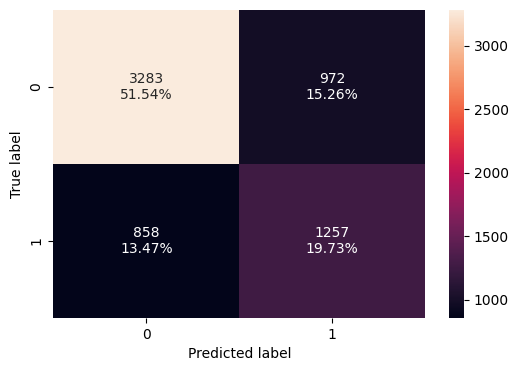

In [61]:

###First identify the better-performing XGBoost model between oversampled and undersampled data based on test set recall, as both aim to address class imbalance.
####Then,  proceed with hyperparameter tuning for the chosen model using RandomizedSearchCV to optimize for recall, following the best practices for XGBoost.


print("Recall of XGBoost with Oversampled data on Test Set:")
display(xgb_oversampled_test_perf['Recall'])

print("\nRecall of XGBoost with Undersampled data on Test Set:")
display(xgb_undersampled_test_perf['Recall'])


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the hyperparameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 250), # 50 to 250 as per best practices
    'learning_rate': uniform(0.01, 0.2), # From 0.01 to 0.2, covering common small values
    'max_depth': randint(3, 10), # Typical values for max_depth
    'gamma': uniform(0, 5), # 0 to 5 as per best practices
    'subsample': uniform(0.6, 0.4), # From 0.6 to 1.0 (0.6 + 0.4)
    'colsample_bytree': uniform(0.6, 0.4), # From 0.6 to 1.0 (0.6 + 0.4)
    'colsample_bylevel': uniform(0.6, 0.4) # From 0.6 to 1.0 (0.6 + 0.4)
}

# Instantiate XGBClassifier
xgb_tuned_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_tuned_model,
    param_distributions=param_distributions,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the oversampled training data
random_search_xgb.fit(X_train_oversampled, y_train_oversampled)

print("\nBest parameters found:", random_search_xgb.best_params_)
print("Best cross-validation recall score:", random_search_xgb.best_score_)

# Train a new XGBoost model with the best parameters
xgb_best_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss', **random_search_xgb.best_params_)
xgb_best_model.fit(X_train_oversampled, y_train_oversampled)

print("\nTuned XGBoost model trained successfully with best parameters.")

# Evaluate the tuned model on the original test set
print("\nPerformance of Tuned XGBoost Model on Test Set:")
xgb_tuned_test_perf = model_performance_classification_sklearn(xgb_best_model, X_test, y_test)
display(xgb_tuned_test_perf)

# Display the confusion matrix for the tuned model on the original test set
print("\nConfusion Matrix for Tuned XGBoost Model on Test Set:")
confusion_matrix_sklearn(xgb_best_model, X_test, y_test)

## Actionable Insights and Recommendations

In [63]:
import pandas as pd

# Aggregate all test set performance metrics into a single DataFrame
model_performance = pd.DataFrame({
    'Model': [
        'XGBoost (Original)',
        'XGBoost (Oversampled Training)',
        'XGBoost (Undersampled Training)',
        'XGBoost (Tuned Oversampled Training)'
    ],
    'Accuracy': [
        xgb_model_test_perf['Accuracy'].values[0],
        xgb_oversampled_test_perf['Accuracy'].values[0],
        xgb_undersampled_test_perf['Accuracy'].values[0],
        xgb_tuned_test_perf['Accuracy'].values[0]
    ],
    'Recall': [
        xgb_model_test_perf['Recall'].values[0],
        xgb_oversampled_test_perf['Recall'].values[0],
        xgb_undersampled_test_perf['Recall'].values[0],
        xgb_tuned_test_perf['Recall'].values[0]
    ],
    'Precision': [
        xgb_model_test_perf['Precision'].values[0],
        xgb_oversampled_test_perf['Precision'].values[0],
        xgb_undersampled_test_perf['Precision'].values[0],
        xgb_tuned_test_perf['Precision'].values[0]
    ],
    'F1': [
        xgb_model_test_perf['F1'].values[0],
        xgb_oversampled_test_perf['F1'].values[0],
        xgb_undersampled_test_perf['F1'].values[0],
        xgb_tuned_test_perf['F1'].values[0]
    ]
})

# Sort by Recall for primary evaluation
model_performance = model_performance.sort_values(by='Recall', ascending=False)

print("Comparison of Model Performance on Test Set:")
display(model_performance)

Comparison of Model Performance on Test Set:


,Model,Accuracy,Recall,Precision,F1
2,XGBoost (Undersampled Training),0.689953,0.684161,0.525418,0.594373
3,XGBoost (Tuned Oversampled Training),0.712716,0.594326,0.563930,0.578729
1,XGBoost (Oversampled Training),0.716484,0.587234,0.571034,0.579021
0,XGBoost (Original),0.729042,0.468558,0.622097,0.534520


Top 10 Most Influential Features:


,Feature,Importance
9,education_of_employee_High School,0.330285
8,education_of_employee_Doctorate,0.094857
11,has_job_experience_Y,0.091633
4,continent_Europe,0.084561
10,education_of_employee_Master's,0.056313
13,region_of_employment_Midwest,0.054434
17,full_time_position_Y,0.039063
15,region_of_employment_South,0.035523
7,continent_South America,0.030335
5,continent_North America,0.029677


/tmp/ipython-input-2328767124.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')


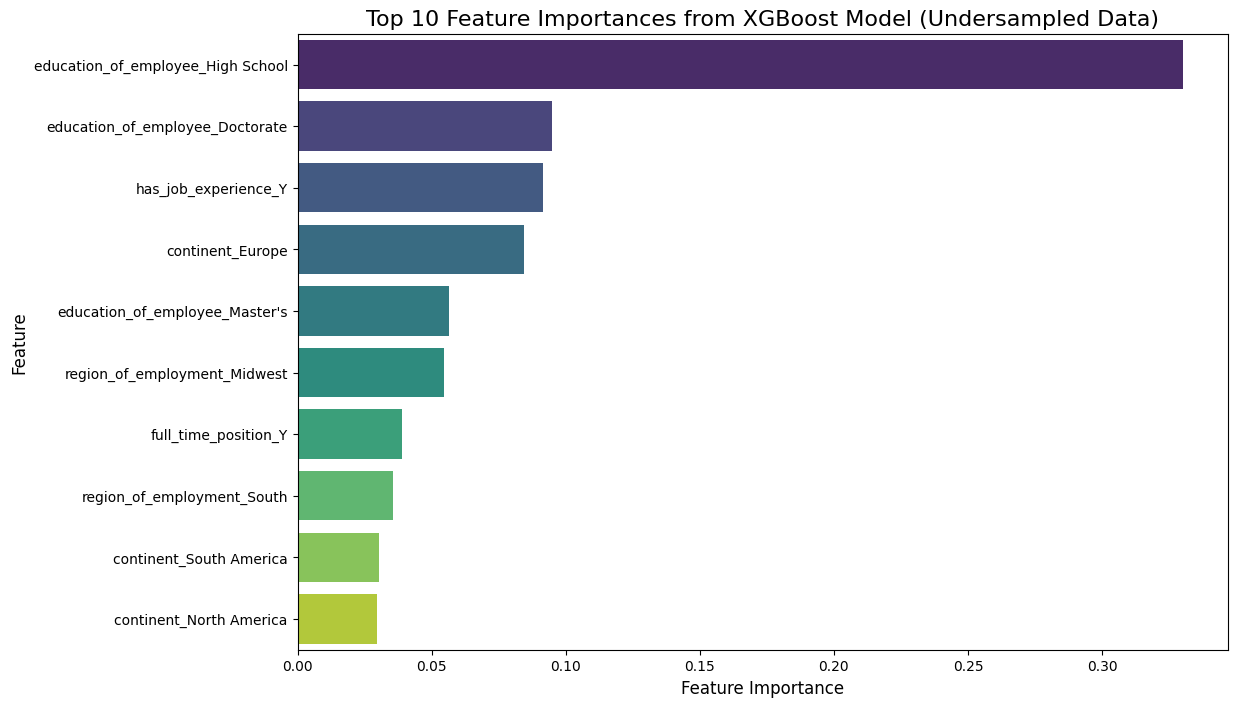

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming xgb_model_undersampled is the best performing model based on previous analysis (highest recall)
# The instructions specifically state to use xgb_model_undersampled from the previous step
best_model = xgb_model_undersampled

# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most influential features
print("Top 10 Most Influential Features:")
display(features_df.head(10))

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances from XGBoost Model (Undersampled Data)', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

Based on above data:

**Best Model **
XGBoost (Undersampled Training Data) model which achieves the highest Recall . The best for the problem at hand.

** Top Criteria for visa certification/approval**
1. Education and Experience
2. Job search by region
3. Prioritizing FT jobs




### Final Model Selection (Conclusion and Recomendations)

**Conclusion:**

Based on the evaluation, the XGBoost (Undersampled Training Data) model achieves the highest Recall of 0.684161. While its Precision (0.525418) and Accuracy (0.689953) are slightly lower than some other models (like the original XGBoost), the significant improvement in Recall makes it the most suitable choice for our objective of maximizing the identification of positive cases (certified visas).

The Tuned XGBoost model, while showing improvement over the initial oversampled model, did not surpass the recall performance of the undersampled model. Given the problem statement's emphasis on facilitating visa approvals, a higher recall is prioritized even if it comes with a slight trade-off in precision.

**Recomendations For Easy Visa :**

Best profile for the applicants whose visa should be certified or denied should be based on the following Criteria:

* Education and Experience
* Based onregion
* Prioritizing FT jobs


